## Clustering & PCA Assignment for HELP International 

### Objective: To categorise the countries using socio-economic and health factors that determine the overall development of the country.


#### Import all necessary libraries

In [1]:

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Reaidng the Dataset 
path="C:/Subhajit/Newfolder/IOT/DS/Assgnments/Clustering & PCA Assignment/"
Country_data=pd.read_csv(path+"Country-data.csv")

#### Let's understand the structure of our dataframe

In [3]:
#Reading the first 5 rows of the dataset
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- Here, exports, heath and imports variables are in percenatge of the total GDP format. So, It is converted into actual value on the basis of GDPP as below since, GDP data and population data is not present ihe data set.

In [4]:
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100

#### Let's read first 5 rows after converting the exports, heath and imports variables

In [5]:
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Checking of the outliers in each columns

In [6]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- Let's plot the box plots to check outliers 

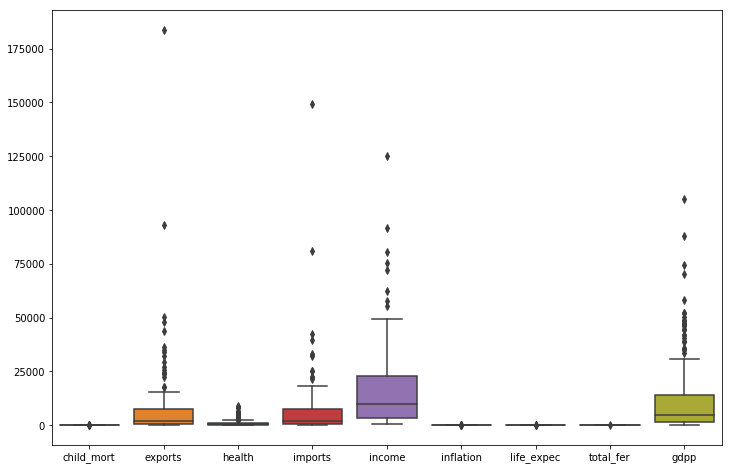

In [7]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=Country_data)

- From the above table, we can see there are some outliers in case of exports,imports,income, gdpp, etc. We will handle this after performing PCA to derive principal components after considering the elemination of Country.

In [8]:
print("The number of countries are : ",Country_data.shape[0])

The number of countries are :  167


#### Checking the datatypes of each variable

In [9]:
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


From above datatype information all the datattypes are in correct format.

#### Checking of null or NaN values

In [10]:
Country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
Country_data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### As we can see there is no missing data(null,NaN values) in the list

#### Let's plot the heat map to check the multicollinearity of the variables.

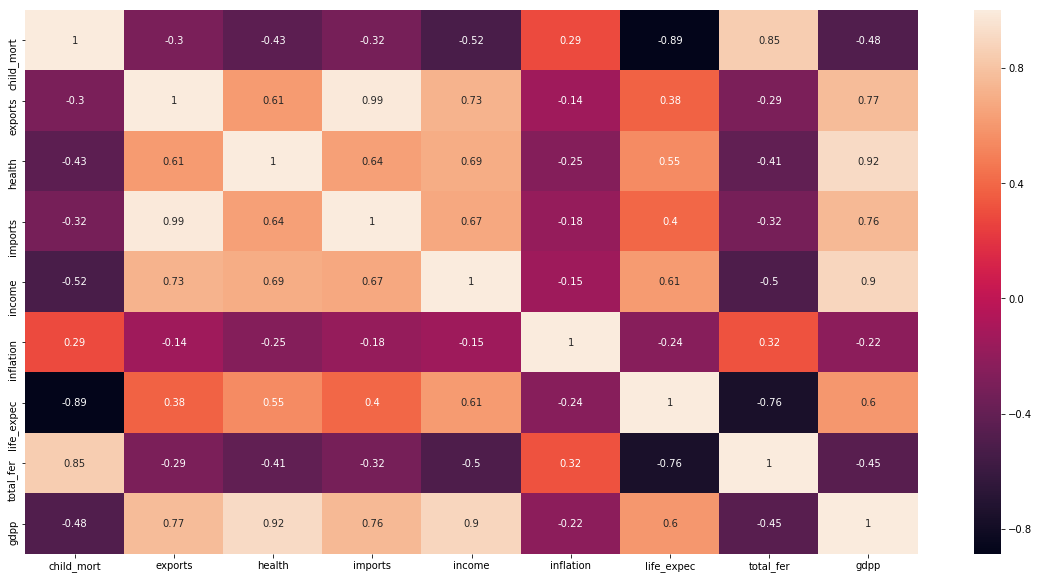

In [12]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(Country_data.corr(),annot = True)

- from above heatmap, we can see exports is highly correlated with import. health, exports, income,imports are highly correlated with gdpp. So, it will be treated after performing PCA.

### Data Preparation

####  Performing PCA on the data ( Principal Component Analysis)


- Applying scaling to the data 


In [13]:
## First let us see if we can explain the dataset using fewer variables
from sklearn.preprocessing import StandardScaler
Country_data1=Country_data.drop('country',1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data1)

C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\611806022\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


- Perfoming PCA

In [14]:
pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

###### List of PCA components.

In [15]:

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

##### Let's check the variance ratios of each features

In [16]:

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

#####  Plotting the scree plot

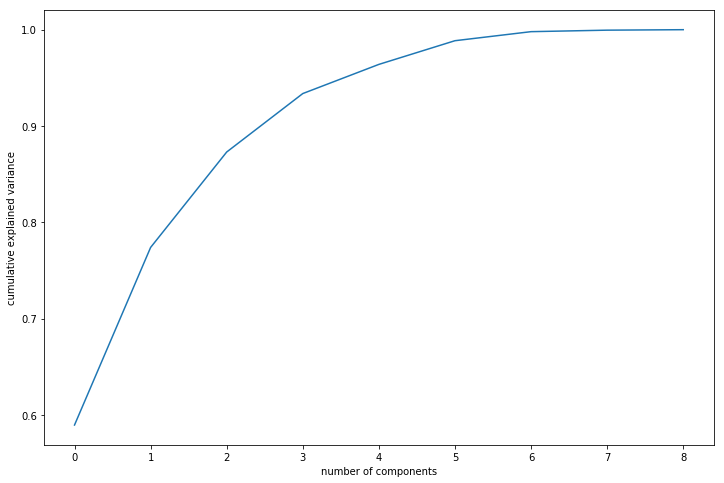

In [17]:

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### From above scree plot, Around 98% of the information is being explained by 5 components.

- Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.

In [18]:

colnames = list(Country_data1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

- Let's plot them to visualise how these features are loaded

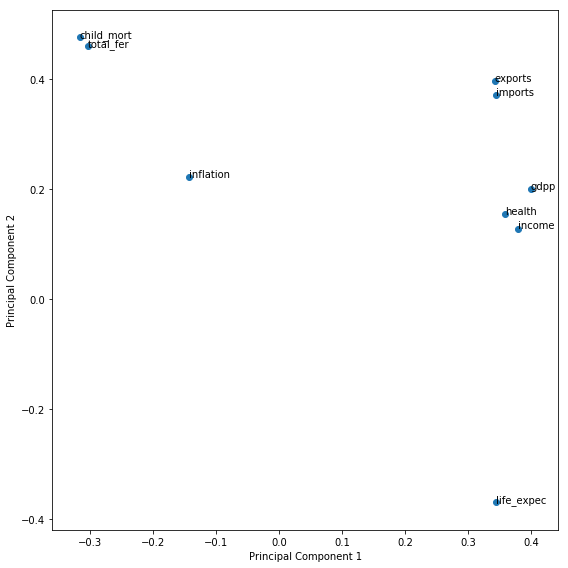

In [19]:

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

From the above plot, we can see the first component is in the dirction where the imports, exports, gdpp,income, health,life_expec are heavy and second component is in the direction where child_mort , total_fer is more.

 - These variables also have the highest of the loadings
 
 
 #### Performing Incremental PCA

In [20]:
#Finally let's go ahead and do dimenstionality reduction using the four Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [21]:
df_pca = pca_final.fit_transform(Country_scaled)
df_pca.shape

(167, 5)

In [22]:
df_pca

array([[-2.63633780e+00,  1.47225984e+00, -5.48330498e-01,
         2.38302128e-01,  6.10029273e-02],
       [-2.37829162e-02, -1.43553539e+00, -1.54701978e-02,
        -4.28278354e-01, -1.54305141e-01],
       [-4.59228259e-01, -6.79704711e-01,  9.56536815e-01,
        -1.93531315e-01, -9.21275020e-02],
       [-2.72347181e+00,  2.17496646e+00,  5.97396852e-01,
         4.17695067e-01,  5.66944470e-02],
       [ 6.49103499e-01, -1.02640436e+00, -2.58645163e-01,
        -2.76882415e-01,  7.70873177e-02],
       [ 3.59501355e-02, -6.85691881e-01,  1.46841882e+00,
         4.60321765e-02, -9.31926507e-02],
       [-3.34457119e-01, -1.27861656e+00,  1.90805480e-01,
        -4.77018594e-01, -2.53557140e-01],
       [ 3.18403890e+00, -2.39407303e-01, -1.31692434e-01,
         1.67437937e+00,  8.73676249e-02],
       [ 3.81774167e+00,  2.62449000e-01, -2.58554292e-01,
         1.02465750e+00, -2.99611118e-01],
       [-4.68004699e-01, -4.93948233e-01,  6.11513868e-01,
        -2.76290913e-01

#### Creating a transpose so that the each column is properly arranged

In [23]:

pc = np.transpose(df_pca)

- Creating correlation matrix for the principal components

In [24]:

corrmat = np.corrcoef(pc)

- Plotting the correlation matrix of the principal components

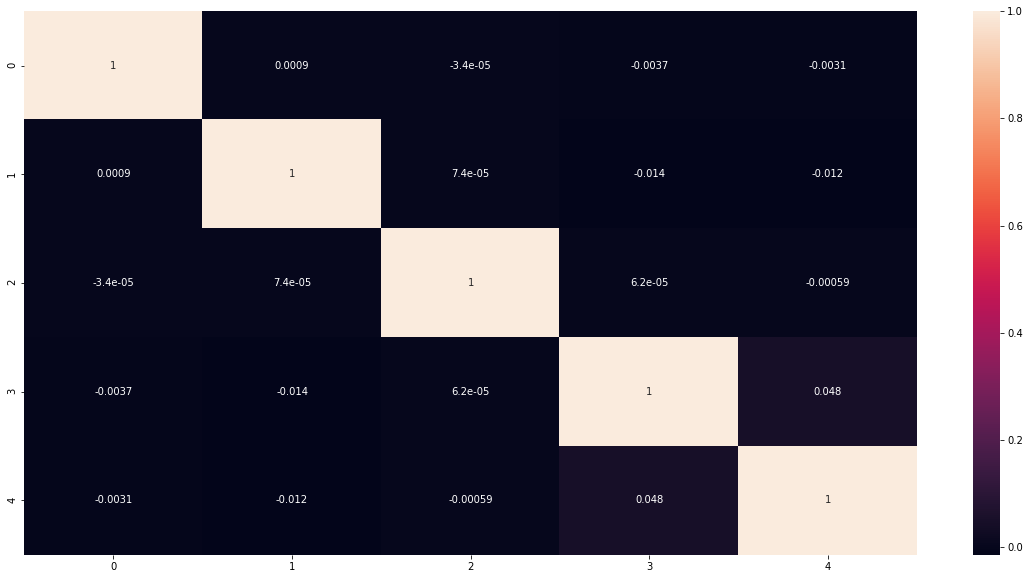

In [25]:

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

- From above heat map, we can see all the compnents are not correlated to each other.

##### Creating the dataframe of all 5 principal components

In [26]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

##### Checking outliers of all the principal complnents

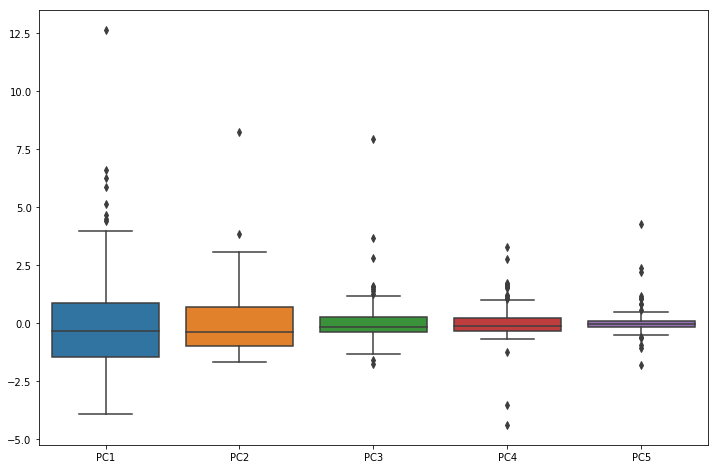

In [27]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pcs_df2)
plt.show()

##### From above boxplots, we can see the Outliers in the data, So we will do the outlier treatment below

In [28]:
pcs_df2.shape

(167, 5)

In [29]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [30]:
## Let's perform the Outlier Analysis
'''plt.boxplot(pcs_df2.PC1)
Q1=pcs_df2.PC1.quantile(0.05)
Q3=pcs_df2.PC1.quantile(0.95)
IQR=Q3-Q1
pcs_df2=pcs_df2[(pcs_df2.PC1 >= Q1- 1.5*IQR) & (pcs_df2.PC1<=Q3+ 1.5*IQR)]'''

'plt.boxplot(pcs_df2.PC1)\nQ1=pcs_df2.PC1.quantile(0.05)\nQ3=pcs_df2.PC1.quantile(0.95)\nIQR=Q3-Q1\npcs_df2=pcs_df2[(pcs_df2.PC1 >= Q1- 1.5*IQR) & (pcs_df2.PC1<=Q3+ 1.5*IQR)]'

In [31]:
'''plt.boxplot(pcs_df2.PC2)
Q1=pcs_df2.PC2.quantile(0.05)
Q3=pcs_df2.PC2.quantile(0.95)
IQR=Q3-Q1
pcs_df2=pcs_df2[(pcs_df2.PC2 >= Q1- 1.5*IQR) & (pcs_df2.PC2<=Q3+ 1.5*IQR)]'''

'plt.boxplot(pcs_df2.PC2)\nQ1=pcs_df2.PC2.quantile(0.05)\nQ3=pcs_df2.PC2.quantile(0.95)\nIQR=Q3-Q1\npcs_df2=pcs_df2[(pcs_df2.PC2 >= Q1- 1.5*IQR) & (pcs_df2.PC2<=Q3+ 1.5*IQR)]'

In [32]:
'''plt.boxplot(pcs_df2.PC3)
Q1=pcs_df2.PC3.quantile(0.05)
Q3=pcs_df2.PC3.quantile(0.95)
IQR=Q3-Q1
pcs_df2=pcs_df2[(pcs_df2.PC3 >= Q1- 1.5*IQR) & (pcs_df2.PC3<=Q3+ 1.5*IQR)]'''

'plt.boxplot(pcs_df2.PC3)\nQ1=pcs_df2.PC3.quantile(0.05)\nQ3=pcs_df2.PC3.quantile(0.95)\nIQR=Q3-Q1\npcs_df2=pcs_df2[(pcs_df2.PC3 >= Q1- 1.5*IQR) & (pcs_df2.PC3<=Q3+ 1.5*IQR)]'

In [33]:
'''plt.boxplot(pcs_df2.PC4)
Q1=pcs_df2.PC4.quantile(0.05)
Q3=pcs_df2.PC4.quantile(0.95)
IQR=Q3-Q1
pcs_df2=pcs_df2[(pcs_df2.PC4 >= Q1- 1.5*IQR) & (pcs_df2.PC4<=Q3+ 1.5*IQR)]'''

'plt.boxplot(pcs_df2.PC4)\nQ1=pcs_df2.PC4.quantile(0.05)\nQ3=pcs_df2.PC4.quantile(0.95)\nIQR=Q3-Q1\npcs_df2=pcs_df2[(pcs_df2.PC4 >= Q1- 1.5*IQR) & (pcs_df2.PC4<=Q3+ 1.5*IQR)]'

In [34]:
'''plt.boxplot(pcs_df2.PC5)
Q1=pcs_df2.PC5.quantile(0.05)
Q3=pcs_df2.PC5.quantile(0.95)
IQR=Q3-Q1
pcs_df2=pcs_df2[(pcs_df2.PC5 >= Q1- 1.5*IQR) & (pcs_df2.PC5<=Q3+ 1.5*IQR)]'''

'plt.boxplot(pcs_df2.PC5)\nQ1=pcs_df2.PC5.quantile(0.05)\nQ3=pcs_df2.PC5.quantile(0.95)\nIQR=Q3-Q1\npcs_df2=pcs_df2[(pcs_df2.PC5 >= Q1- 1.5*IQR) & (pcs_df2.PC5<=Q3+ 1.5*IQR)]'

In [35]:
pcs_df2.shape

(167, 5)

- After doing outlier treatment, we can see some of the countries data are removed, So we can not remove those countries because we may remove the un-developed country data which needs funding as per business objective.

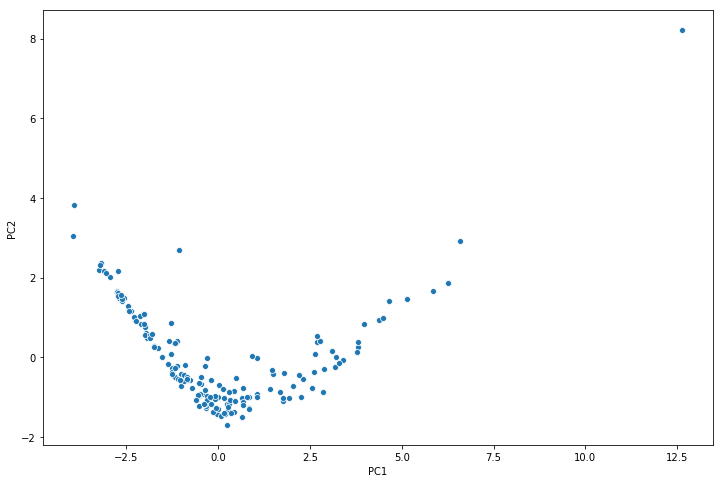

In [36]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

- We can see some of the grouping as before and after 0 value of PC1


### Clustering Process
##### Let's go ahead and begin with the clustering process i.e first we are calculating the Hopkins statistic

In [37]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
PC1    167 non-null float64
PC2    167 non-null float64
PC3    167 non-null float64
PC4    167 non-null float64
PC5    167 non-null float64
dtypes: float64(5)
memory usage: 6.6 KB


- Let's check the Hopkins measure

In [39]:

hopkins(pcs_df2)

0.9250543405444827

- Since the value is > 0.5 the given dataset has a good tendency to form clusters.

In [40]:
pcs_df2.shape

(167, 5)

##### Assigning pcs_df2 dataframe to a new variable

In [41]:
dat3_1 = pcs_df2

### Performing k-Means Clustering

##### First we'll do the silhouette score analysis

In [42]:

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

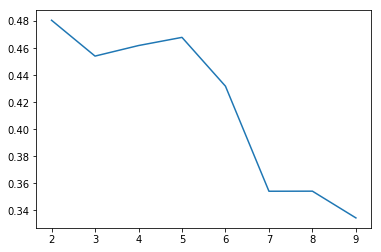

In [43]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm.

#### Checking with elbow curve

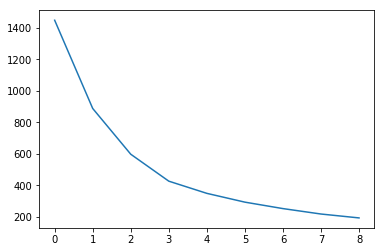

In [44]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Here also we're seeing a distinct bend at around 3 clusters. Hence, checking with Silhouette Analysis also .


#### Again we are doing Silhouette Analysis with scores


In [45]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(dat3_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48066046782755917
For n_clusters=3, the silhouette score is 0.4541512897971508
For n_clusters=4, the silhouette score is 0.4629814641482611
For n_clusters=5, the silhouette score is 0.47223519247432166
For n_clusters=6, the silhouette score is 0.41074118135089766
For n_clusters=7, the silhouette score is 0.34728874676042476
For n_clusters=8, the silhouette score is 0.3581127602787835


#### As per elbow curve, Let's perform K means using K=3 

In [46]:
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [47]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
5,0.035950,-0.685692,1.468419,0.046032,-0.093193,1
6,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,1
7,3.184039,-0.239407,-0.131692,1.674379,0.087368,0
8,3.817742,0.262449,-0.258554,1.024658,-0.299611,0
9,-0.468005,-0.493948,0.611514,-0.276291,0.115536,1


In [48]:
dat_km['ClusterID'].value_counts()

1    91
2    48
0    28
Name: ClusterID, dtype: int64

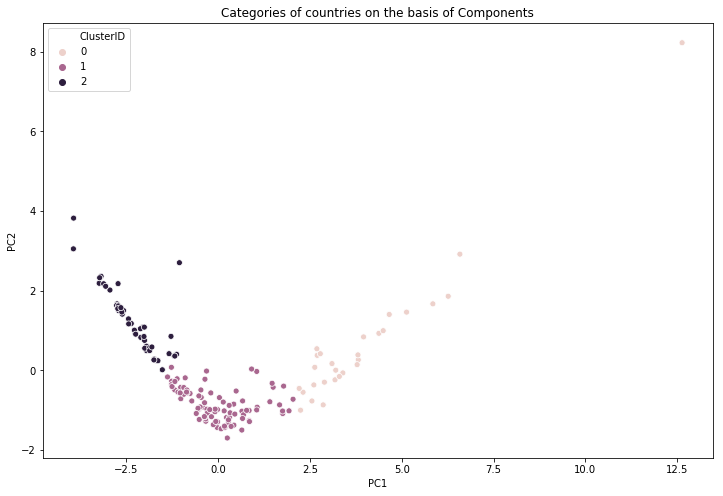

In [49]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

plt.title('Categories of countries on the basis of Components')
plt.show()



-  From above plots, we can clearly see the 3 clusters . 

- Now we are merging clusters with the original dataset. 

In [50]:
dat5=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


##### Dropping all the principal components from merged  dataframe.

In [51]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [52]:
dat6.shape

(167, 11)

- So we have performed the clustering using the PCs and have now allocated the clusterIDs back to GDPP, child_mort, income of the datapoints.

### Analysis of the clusters

- calculating the mean of all the variables of each clusters. 

In [53]:
Cluster_GDPP=pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
Cluster_exports=pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
Cluster_income=pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
Cluster_health=pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
Cluster_imports=pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
Cluster_inflation=pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())

- Concatenating all the grouped by data to create a new dataframe to find required mean.

In [54]:
df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)

- Creating a dataframe of mean of all the variables of all the clusters 

In [55]:
df.columns = ["GDPP","child_mort","income","exports","health","imports","inflation","life_expec","total_fer"]
df

,GDPP,child_mort,income,exports,health,imports,inflation,life_expec,total_fer
ClusterID,,,,,,,,,
0,48114.285714,5.046429,50178.571429,31038.239286,4327.163214,25818.100000,3.014679,80.514286,1.760714
1,7979.912088,20.357143,13968.021978,3604.149434,547.279455,3710.446386,7.070549,73.460440,2.235055
2,1909.208333,91.610417,3897.354167,879.063521,114.821765,827.028771,11.911146,59.239583,4.992083


- Analysing the clusters by comparing how the [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

- From above dataframe of means, we got the mean data of under-developed countries. So, creating a dataframe on the basis of same.

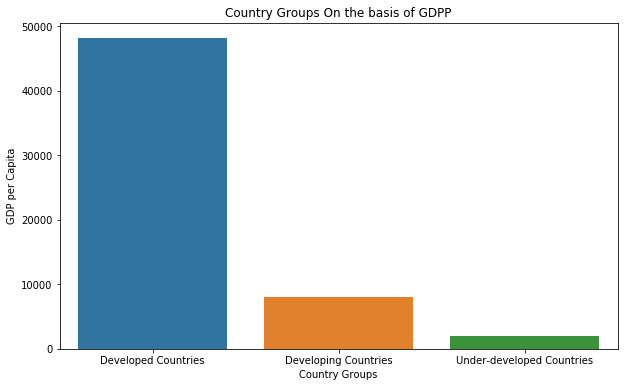

In [56]:
fig = plt.figure(figsize = (10,6))
df.rename(index={0: 'Developed Countries'},inplace=True)
df.rename(index={1: 'Developing Countries'},inplace=True)
df.rename(index={2: 'Under-developed Countries'},inplace=True)
s=sns.barplot(x=df.index,y='GDPP',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('Country Groups On the basis of GDPP')
plt.show()

- Above bar chart shows that, all the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.

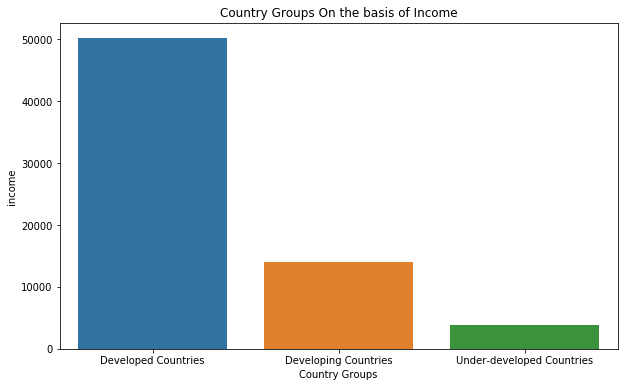

In [57]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='income',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Income')
plt.show()

- Similarly, Above bar chart shows that, all the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.

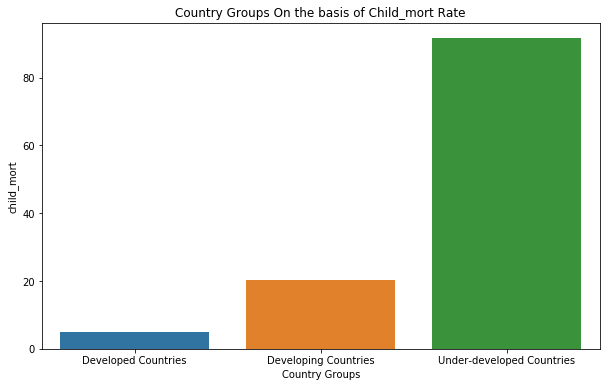

In [58]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x=df.index,y='child_mort',data=df)
plt.xlabel('Country Groups', fontsize=10)
plt.title('Country Groups On the basis of Child_mort Rate')
plt.show()

So, Above bar chart shows that, all the developed countries are having low number of death of children under 5 years of age per 1000 live births, developing countries are having average death rate and poor countries are having the least daeth rate.

In [59]:
#Let's use the concept of binning
fin=Country_data[Country_data['gdpp']<=1909]
fin=fin[fin['child_mort']>= 92]
fin=fin[fin['income']<= 3897.35]

- Merging to get the cluster ids

In [60]:
fin_k=pd.merge(fin,dat_km,left_index=True,right_index=True)

In [61]:
fin_k=fin_k.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [62]:
fin_k.shape

(17, 11)

- After merging, we are getting 17 under-developed countries, where gdpp, income are less but child_mort is more.

In [63]:
fin_k_GDPP=fin_k.nsmallest(8,'gdpp')
fin_k_GDPP

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2


- Above list shows all the top low GDPP countries.

In [64]:
fin_k_income=fin_k.nsmallest(8,'income')
fin_k_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2


- Above list shows all the top low income countries.

In [65]:
fin_k_mort=fin_k.nlargest(8,'child_mort')
fin_k_mort

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2


- Above list shows all the top high child mort countries.

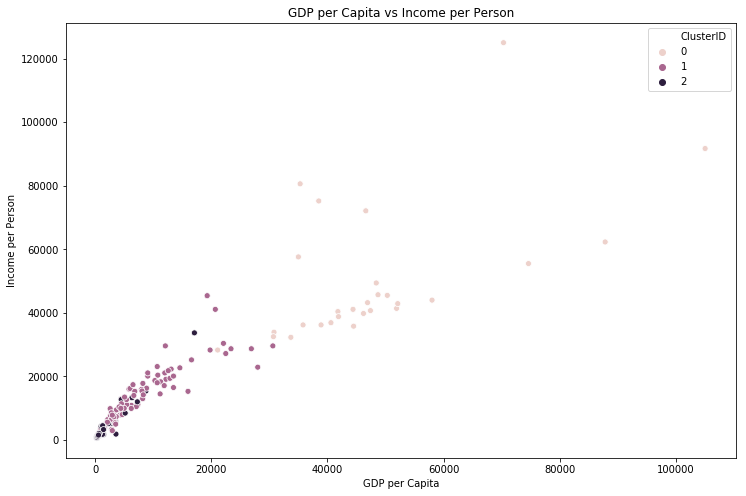

In [66]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('GDP per Capita vs Income per Person')
plt.show()

- From above scatter plot of gdpp and income, we can see there is some clustering like where gdpp is more, then income is also more.

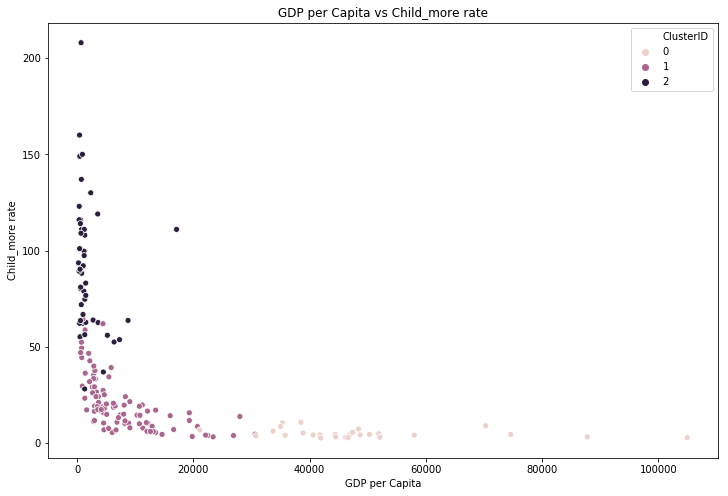

In [67]:
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='gdpp',y='child_mort',hue='ClusterID',legend='full',data=dat6)
plt.xlabel('GDP per Capita', fontsize=10)
plt.ylabel('Child_more rate', fontsize=10)
plt.title('GDP per Capita vs Child_more rate')
plt.show()

- From above scatter plot of gdpp and child-mort, we can see there is some clustering where gdpp is more, there child-mort is low.

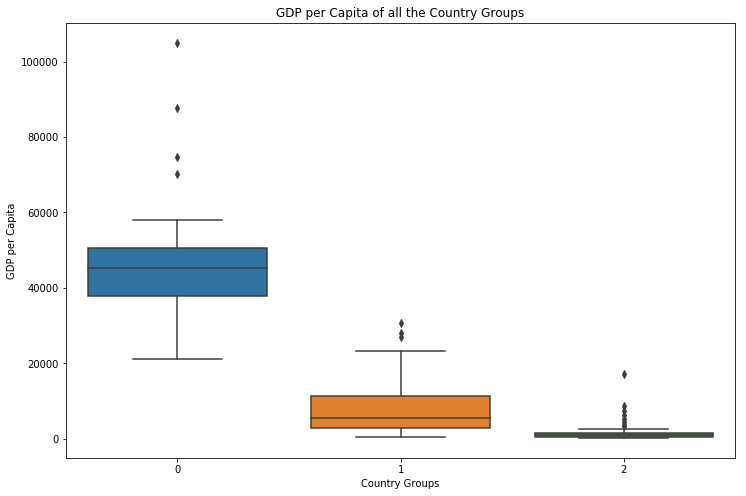

In [68]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='gdpp',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Country Groups')
plt.show()

- Here, Developed countries are falling under 1st cluster because of high gdpp range. Poor countries are falling under cluster 2.

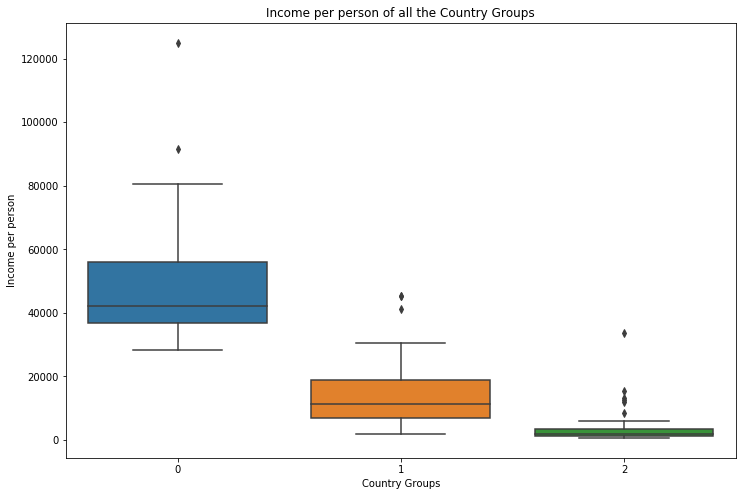

In [69]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='income',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Income per person of all the Country Groups')
plt.show()

Here, As Developed countries are falling under 1st cluster that is 0, So the income is in high range i.e. under cluster 0. Poor contries are falling under cluster 2 as per the income also.

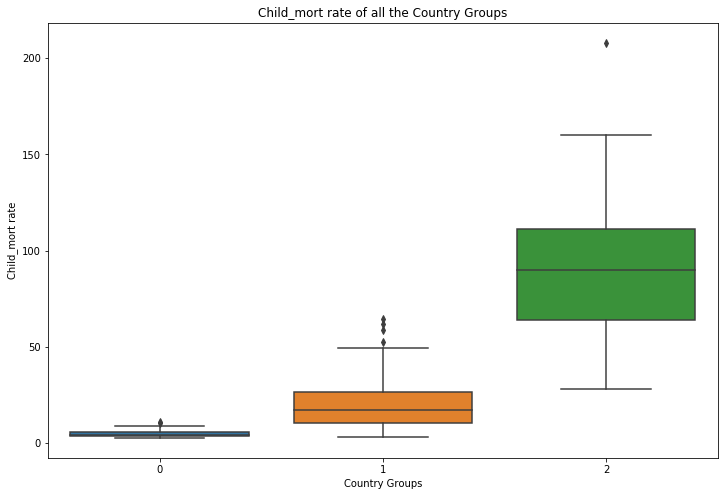

In [70]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(x='ClusterID',y='child_mort',data=dat6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.title('Child_mort rate of all the Country Groups')
plt.show()

- From the above plots we can see poor countries are falling under cluster 2. So, the child_mort rate is more in these countries. 

In [71]:
Developed_con_K=dat6[dat6['ClusterID']==0]
Avg_Developed_con_K=dat6[dat6['ClusterID']==1]
Poor_con_K=dat6[dat6['ClusterID']==2]

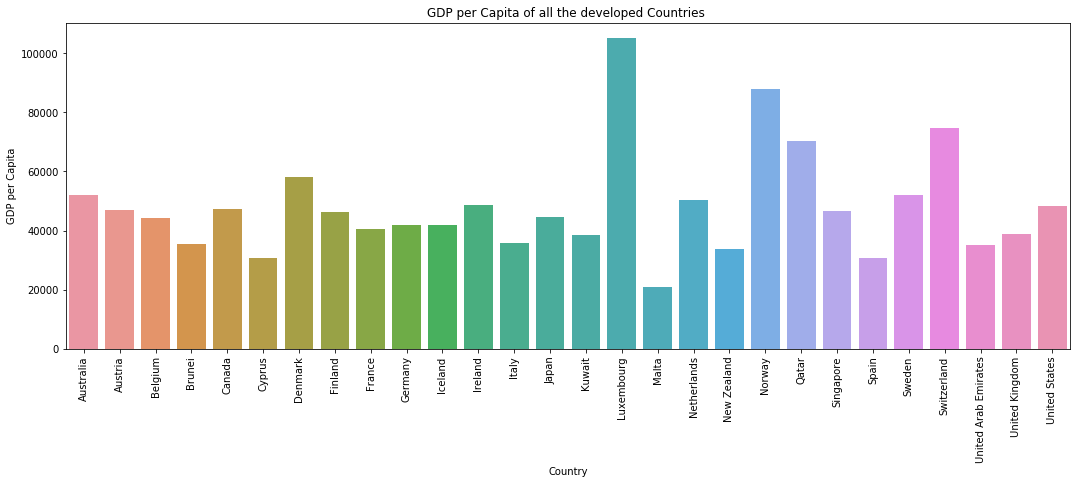

In [72]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Developed_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the developed Countries ')
plt.show()



- From the above barchart, we can see all the developed countries like Luxembourg, Australia, etc. 

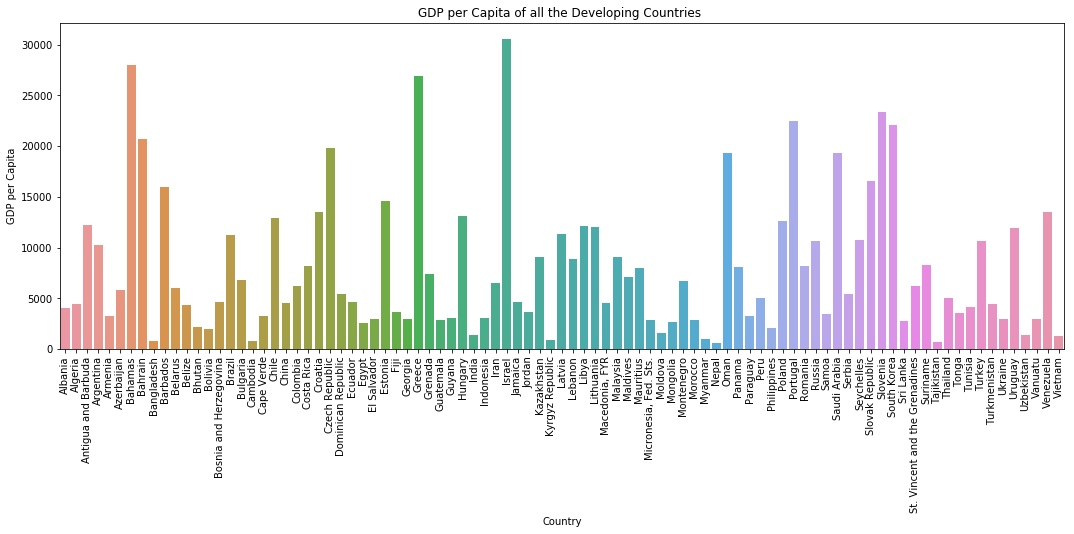

In [73]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Avg_Developed_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Developing Countries ')
plt.show()

- From the above barchart, we can see all the Developing countries like Iran, Albania, etc.

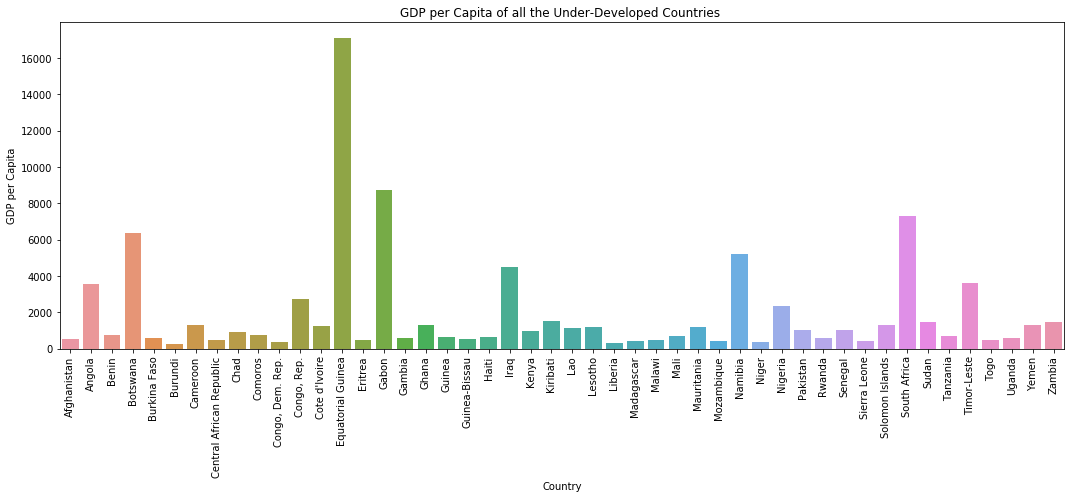

In [74]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='gdpp',data=Poor_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('GDP per Capita', fontsize=10)
plt.title('GDP per Capita of all the Under-Developed Countries ')
plt.show()


- From the above barchart, we can see all the Under-developed countries like Burundi, Afghanistan, etc.

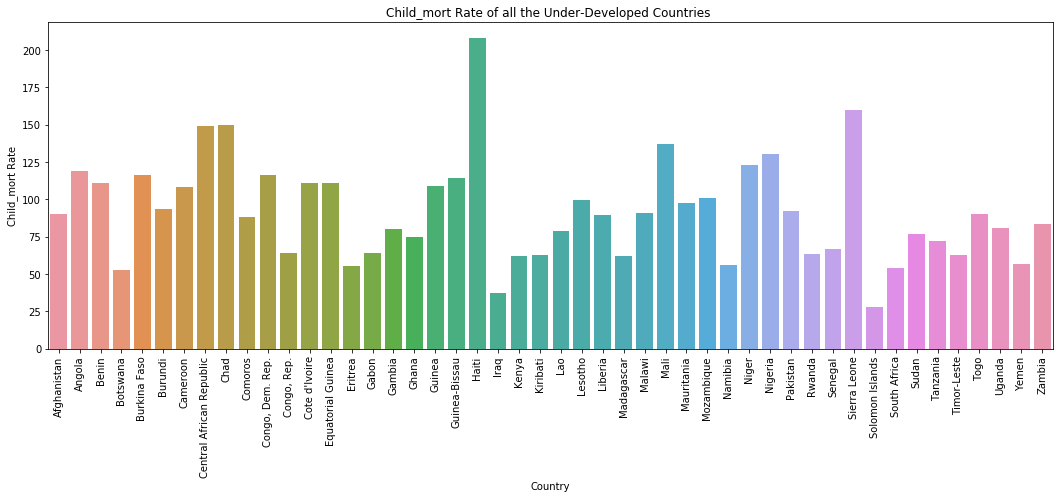

In [75]:
fig = plt.figure(figsize = (18,6))
s=sns.barplot(x='country',y='child_mort',data=Poor_con_K)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Child_mort Rate', fontsize=10)
plt.title('Child_mort Rate of all the Under-Developed Countries ')
plt.show()

- From the above barchart, we can see all the Under-developed countries like Haiti, Sierra Leone, etc., where child_mort rate is more

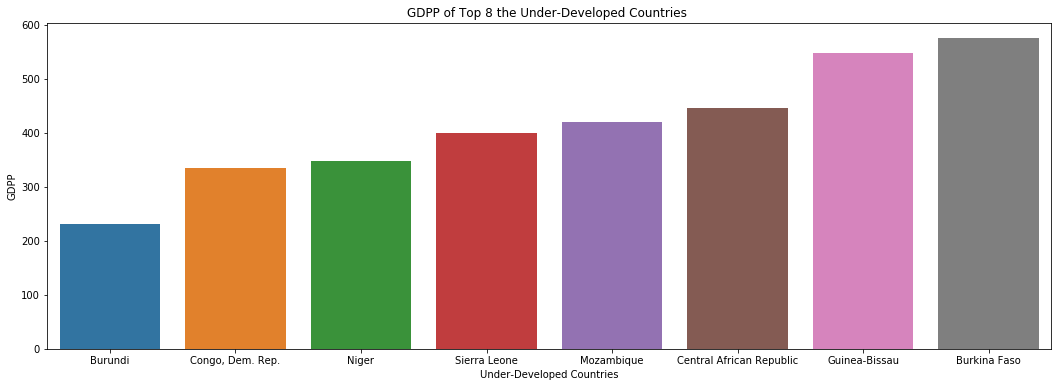

In [76]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='gdpp',data=fin_k_GDPP)
plt.title('GDPP of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('GDPP', fontsize=10)
plt.show()

- Top 8 under-developed countries in under-developement group, where GDPP is very low of countries like Burundi, Congo, etc.

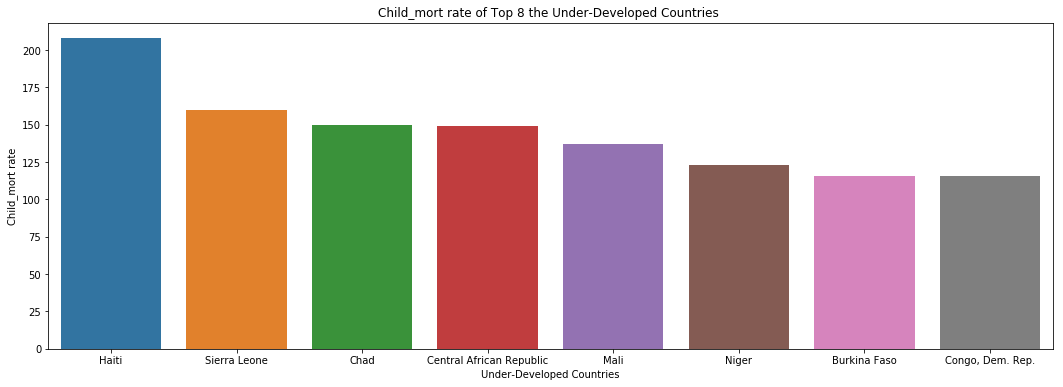

In [77]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='child_mort',data=fin_k_mort)
plt.title('Child_mort rate of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Child_mort rate', fontsize=10)
plt.show()

- Top 8 under-developed countries in under-developement group, where child death is very high in countries like Haiti, Sierra, etc.

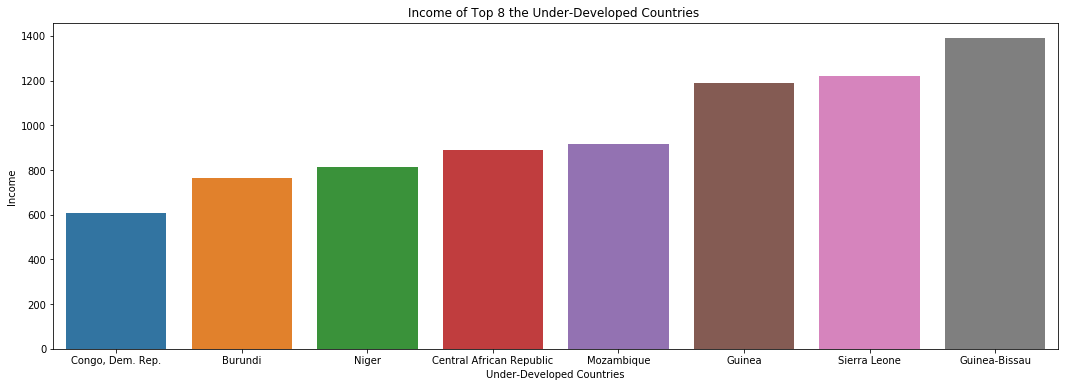

In [78]:
fig = plt.figure(figsize = (18,6))
sns.barplot(x='country',y='income',data=fin_k_income)
plt.title('Income of Top 8 the Under-Developed Countries ')
plt.xlabel('Under-Developed Countries', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

- Top 8 under-developed countries in under-developement group, where income is very low of countries like  Congo, Burundi, etc.

### Performing Hirarchical Clustering

In [79]:
pcs_df2.shape

(167, 5)

In [80]:
pcs_df3 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [81]:
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


#### Performing Single Linkage

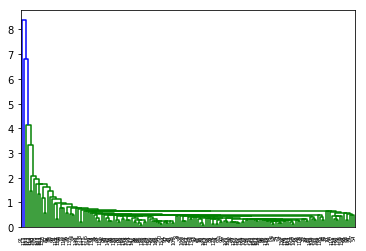

In [82]:
mergings=linkage(pcs_df2,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

### Performing Complete Linkage

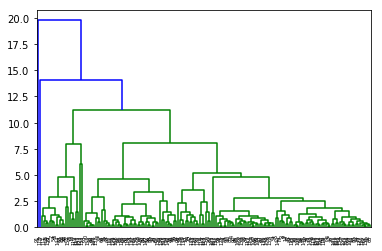

In [83]:
#mergings=linkage(fin,method='complete',metric='euclidean')
mergings=linkage(pcs_df2,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

#### From above dendrograms, we can derive the 2 clusters.

In [84]:
cut_tree(mergings,n_clusters=3).shape

(167, 1)

- Let's  reshape the cut_tree result array

In [85]:
cluser_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
cluser_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
#assign cluster labels

dat_km['Cluster_lables']=cluser_labels
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


In [87]:
dat7=pd.merge(Country_data,dat_km, left_index=True,right_index=True)
dat7.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,0


In [88]:
dat8=dat7.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat8.shape

(167, 12)

In [89]:
dat8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


### Analysis of the clusters

In [90]:
Cluster_GDPP_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).gdpp.mean())
Cluster_child_mort_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).child_mort.mean())
Cluster_income_H=pd.DataFrame(dat8.groupby(["Cluster_lables"]).income.mean())

In [91]:
df_H = pd.concat([Cluster_GDPP_H,Cluster_child_mort_H,Cluster_income_H], axis=1)

In [92]:
df_H.columns = ["GDPP","child_mort","income"]
df_H

,GDPP,child_mort,income
Cluster_lables,,,
0,12470.812121,37.929091,16765.533333
1,105000.000000,2.800000,91700.000000
2,2330.000000,130.000000,5150.000000


- Filtering the final list of Under-Developed Countries where, more funding is required.

In [93]:
#Let's use the concept of binning
fin_H=Country_data[Country_data['gdpp']<=2330.000000]
fin_H=fin[fin['child_mort']>= 130.000000]
fin_H=fin[fin['income']<= 5150.000000]

In [94]:
fin_H=pd.merge(fin_H,dat_km,left_index=True,right_index=True)

In [95]:
fin_H=fin_H.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)

In [96]:
fin_H.shape

(17, 12)

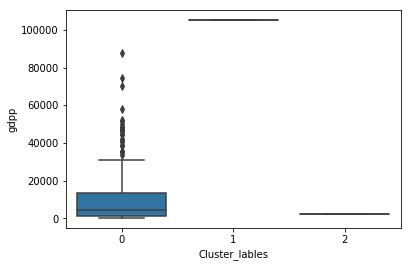

In [97]:
sns.boxplot(x='Cluster_lables',y='gdpp',data=dat8)

-  Here, Developed countries are falling under 2nd cluster because of high gdpp range. Poor countries are falling under cluster 0.

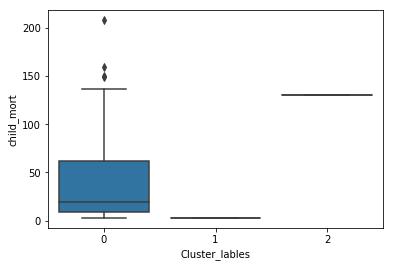

In [98]:
sns.boxplot(x='Cluster_lables',y='child_mort',data=dat8)

- From the above plots we can see poor countries are falling under cluster 0. So, the child_mort rate is more in these countries. 

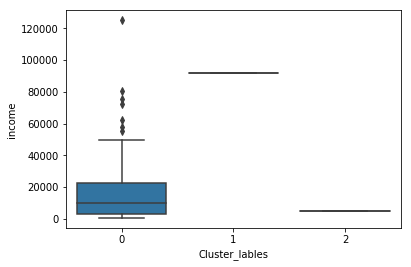

In [99]:
sns.boxplot(x='Cluster_lables',y='income',data=dat8)

- Here, As Developed countries are falling under cluster 1, So the income is in high range 

In [100]:
fin_H.nsmallest(8,'gdpp')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,Cluster_lables
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0


- After comparing both K-means and Heirarchical clustering method, I am going with the K-means outcomes as the plots are clearly visible. As in both the methods, the top 8 under-developed countries are similar. I am considering the result of k-means outcome. 

## Conclusion 

- After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the country.

- Here, the countries are categorised into list of developed countries, developeing countries and under-developed countries.

- In Developed countries, we can see the GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.

- In Developing countries and Under-developed countries, the GDP per capita and income are low and child-mort is high. Specifically, for under-developed countries, the death rate of children is very high.

## Recomendetions

- From bar chats, we can clearly see the socio-economic and heath situation of the under developed countries. 
- In countries like Haiti, Sierra Leone,Chad, etc., the death rate of children under 5 years of age per 1000 (child-mort) is     high.
- In countries like Burundi, Congo, Niger, etc., GDP per capita is very low. So, in those countries, the income per person is also low. So, these countries are considered as poor contries.
- Finally, as per categories of the countries, top 8 under-developed countries which are in direst need of aid are as below:
 
 1. Burundi
 2. Congo, Dem. Rep.
 3. Niger
 4. Sierra Leone
 5. Haiti
 6. Chad
 7. Central African Republic
 8. Mozambique